# <font color='blue'>Chapter 13. Spectrum Analysis</font>

## <font color='blue'>Problem</font>

#### What is Discrete Fourier Transform? (Simple Step by Step)
https://www.youtube.com/watch?v=mkGsMWi_j4Q

#### What is the FFT Algorithm? (Simple Step by Step)
https://www.youtube.com/watch?v=htCj9exbGo0

### <font color='green'>Next: Frequency Response</font>

## <font color='blue'>Introduction to Spectrum</font>

Definition: <br>
The spectrum analysis (頻譜分析) is to seperate signals in different frequencies and amplitudes of sin and cos functions. <br>
The analysis graph is called spectrum, that is the spectrum is used to analyse the amplitudes of deifferent frequencies. <br>
For example, a signal processing system can be applied to detect a speaker who is male, female, or child, 
due to the voices of three groups showing different frequency ranges (spectrum).<br>

If a sinusoid is defined as 
\begin{equation}
x(t) = A \cos (\omega_0 t + \phi) = A \cos (2 \pi f_0 t + \phi) 
\end{equation}
where $A$ and $\omega_0$ are the amplitude and angular frequency, respectively. <br>

According to anti-Euler:
\begin{equation}
\cos (\theta ) = \frac{e^{j\theta}+e^{-j\theta}}{2} 
\end{equation}

Therefore, we have
\begin{equation}
x(t) = A \cos (\omega_0 t + \phi) = \frac{A}{2}e^{j(\omega_0t+\phi)} + \frac{A}{2}e^{-j(\omega_0t+\phi)}
\end{equation}

It means that there are two amplitudes of the sinusoid $x(t)$ when the frequencies are $\omega_0$ and $-\omega_0$ with amplitude $\frac{A}{2}$.
The figure is named amplitude spectrum (振幅頻譜). <br>

Also, the sinusoid $x(t)$ includes two phase shifts, when the frequencies are $\omega_0$ and $-\omega_0$ with phase shifts $\phi$ and $-\phi$.
The figure is named phase spectrum (相位頻譜). <br> 

The two spectrums are named Fourier spectrum or frequency spectrum, in short spectrum. 

<div>
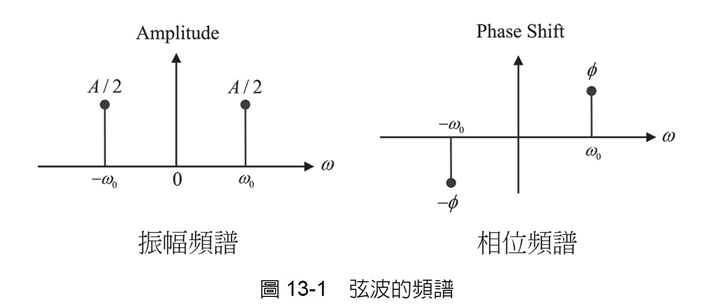
</div>

The the angular frequency $\omega$, ranged in $\pi$ and $-\pi$, unit in radians/sec. <br>
Also, we can represent it by frequency $f$, unit in Hz.

<div>
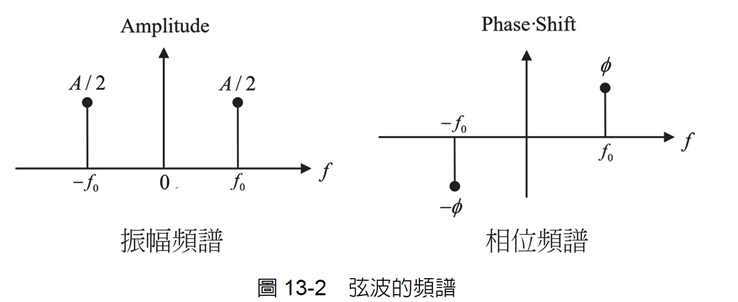
</div>

If the sinusoid is defined as 
\begin{equation}
x(t) = \sum_{k=1}^{N} A_k \cos (2\pi f_k t + \phi) 
\end{equation}
where $f_k=k \cdot f_1$, $f_1$ is the fundamental frequency as shown in follows.

<div>
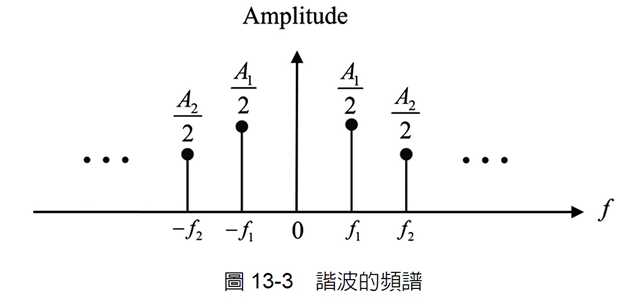
</div>

## <font color='blue'>Fourier Spectrum</font>

The Fourier spectrum is a graphic representation of time-domain in frequency-domain transformed by Fourier Transform 
According to Fourier Transform, a time series $x[n], n=0,1,...,N-1$ can be transformed as

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j 2 \pi kn/N}, k=0,1,...,N-1
\end{equation}

As we know $X[k]$ is a complex, <br>
\begin{equation}
X[k] = |X[k]|+j \arg(X[k]), k=0,1,...,N-1
\end{equation}
where $|X[k]|$ and $\arg(X[k])$ are the magnitude and argument (or phase angle), respectively.

#### <font color='green'> Example 1</font>
Assume a time series is $x={1,2,4,3}, n=0,1,2,3$, try to find its magnitude specturm.<br>
Sol: <br>
    The result of Fourier transform of the time series is <br>
    
\begin{equation}
X[k] = {10, -3+j, 0, -3-j}
\end{equation}

The magnitudes of $X[k]$ are <br>
    
\begin{equation}
|X[k]| = \{10, \sqrt {(-3)^2 +1^2}, 0, \sqrt {(-3)^2 +(-1)^2}\} 
\end{equation}

<div>
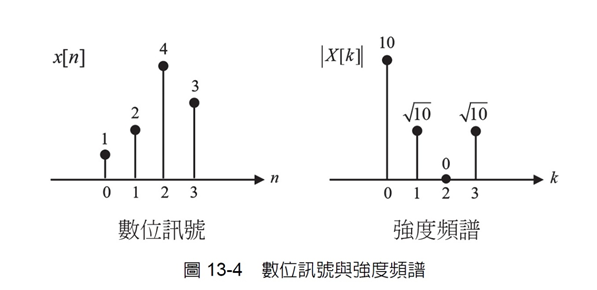
</div>

#### <font color='green'> Example 2: sinusoid </font>
Assume a time series is $x(t)= A \cos (2\pi \cdot (f) \cdot t+\phi)$, where $A=1$, $f=100$, and $\phi=0$. <br>
Try to find its magnitude specturm when $t=0-1 sec$ and sampling rate = 1000 Hz.<br>
Sol: <br>
   
弦波的傅立葉頻譜，結果如圖13-5(a)，先以強度頻譜為主，暫時不討論相位頻譜。<br>
由圖可發現，傅立葉頻譜在k = 100與k = 900處出現峰值(Peaks)，形成所謂的雙邊頻譜(Double-Sided Spectrum)的對稱結構，但不是以原點為中心。其中k = 100的峰值即是弦
波的頻率，振幅則是$ (\frac{A}{2}) \cdot N = 500$.<br>                 。
為方便傅立葉頻譜的觀察與分析，通常會對快速傅立葉轉換的結果進行平移(Shift)<br>
使得頻譜是以原點為中心呈現。Numpy提供的fftshift函式，即是用來實現平移的功能，結果如圖13-5(b)。<br>
以N = 1,000而言，我們可能分析的最大頻率為500 Hz，稱為Nyquist頻率。

<div>
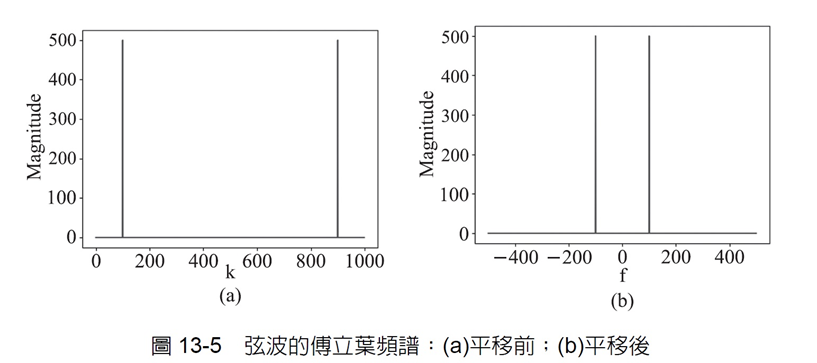
</div>

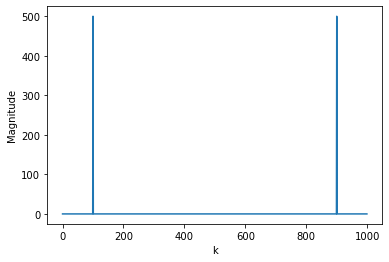

In [1]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 1000, endpoint = False )
x = np.cos( 2 * np.pi * 100 * t ) 

X = fft( ( x ) ) 
Xm = abs( X )  

plt.plot( Xm )
plt.xlabel( 'k' )
plt.ylabel( 'Magnitude' )

plt.show( )

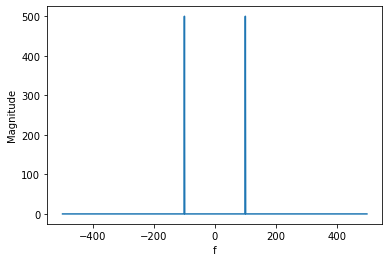

In [2]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 1000, endpoint = False )
x = np.cos( 2 * np.pi * 100 * t ) 

f = fftshift( fftfreq( 1000, 0.001 ) )
X = fftshift( fft( x ) ) 
Xm = abs( X )  

plt.plot( f, Xm )
plt.xlabel( 'f' )
plt.ylabel( 'Magnitude' )

plt.show( )

#### <font color='green'> Example 3: Harmonic Wave (諧波)</font>
Assume a time series is
    
\begin{equation}
x(t)= A_0 + \sum_{k=1}^{N} A_k \cos (2\pi \cdot (f_k) \cdot t)
\end{equation}

where $[A_0, A_1, A_2]=[10, 10, 2]$ and $[f_1, f_2]=[100, 200]$ <br>
Try to find its magnitude specturm when $t=0-1 sec$ and sampling rate = 1000 Hz.<br>
Sol: <br>
   
The peak of the DC component (直流分量) is at frequency $f=0$ with magnitude $A_0 \cdot N$.<br>
The peaks of the AC component (交流分量) are at $f = 100$ and $f = 200$ with magnitude $(A_k/2)\cdot N$.

<div>
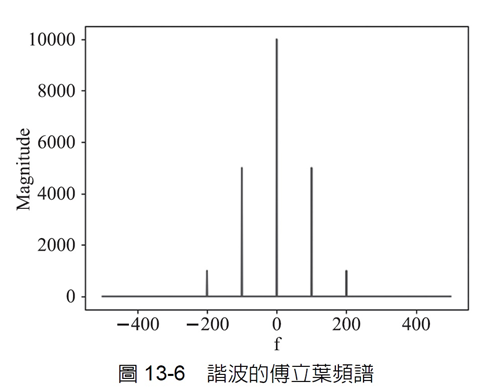
</div>

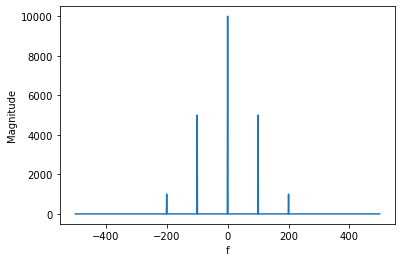

In [3]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 1000, endpoint = False )
x = 10 + 10 * np.cos( 2 * np.pi * 100 * t ) + 2 * np.cos( 2 * np.pi * 200 * t )

f = fftshift( fftfreq( 1000, 0.001 ) )
X = fftshift( fft( x ) ) 
Xm = abs( X )  

plt.plot( f, Xm )
plt.xlabel( 'f' )
plt.ylabel( 'Magnitude' )

plt.show( )

#### <font color='green'> Example 4: Square Wave (方波)</font>
\begin{equation}
x(t)=A\cdot sgn(\sin (\omega t))=A \cdot sgn (\sin(2\pi ft))
\end{equation}

where，A is amplitude, $\omega$is angular frequency, $f$ is Frequency.\
Sgn(.) is called sign function defined as:

\begin{equation}
  sgn(x) =
    \begin{cases}
      1, & \text {if}\; x>0\\
      0, & \text {if}\; x=0\\
      -1, & \text {otherwise}
    \end{cases}       
\end{equation}

where $A=1$, $f=10$. <br>
Try to find its magnitude specturm when $t=0-1 sec$ and sampling rate = 1000 Hz.<br>
Sol: <br>

<div>
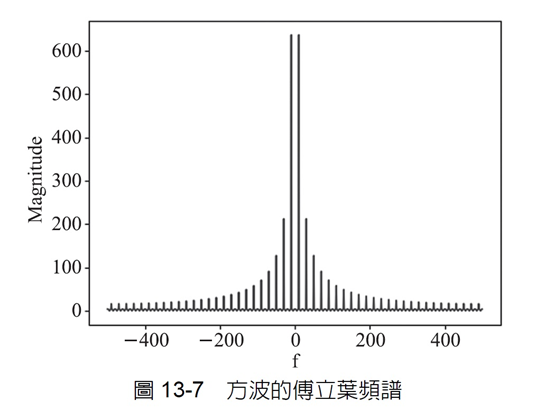
</div>

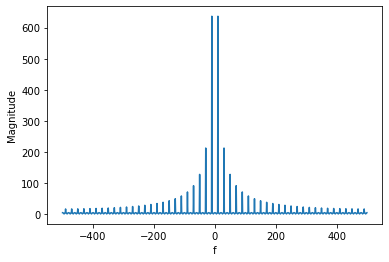

In [4]:
import numpy as np
import scipy.signal as signal
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 1000, endpoint = False )
x = signal.square( 2 * np.pi * 10 * t )

f = fftshift( fftfreq( 1000, 0.001 ) )
X = fftshift( fft( x ) ) 
Xm = abs( X )  

plt.plot( f, Xm )
plt.xlabel( 'f' )
plt.ylabel( 'Magnitude' )

plt.show( )

#### <font color='green'> Example 5: Beat Wave (節拍波)</font>
 
\begin{equation}
x(t)=A\cos (2\pi f_1 t) \cdot \cos (2\pi f_2 t)
\end{equation}

where $A$ is amplitude, $f_1$ and $f_2$ are the low and high frequescies (Hz).<br>
>$f_2$ also is named $f_c$, due to carrier orignal signal $f_1$. <br>
>This operation is the modulation technique for communication.

If $A=1$, $f_1=20$ Hz and $f_2=200$ Hz, what is the magnitude specturm when $t=0-1 sec$ and sampling rate = 1000 Hz.<br>
Sol: <br>
    Two peaks of magnitude are exitsed at frequencies $f_2 \pm f_1 = (200\pm 20)$ of spectrum.

<div>
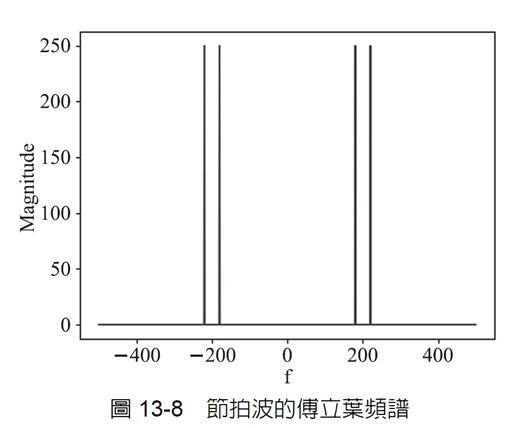
</div>

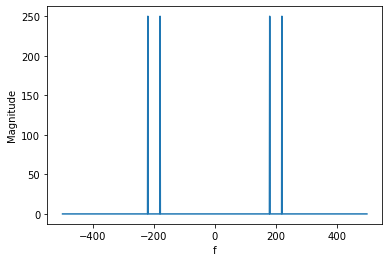

In [5]:
import numpy as np
import scipy.signal as signal
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

f1 = 20
f2 = 200
t = np.linspace( 0, 1, 1000, endpoint = False )
x = np.cos( 2 * np.pi * f1 * t ) * np.cos( 2 * np.pi * f2 * t )

f = fftshift( fftfreq( 1000, 0.001 ) )
X = fftshift( fft( x ) ) 
Xm = abs( X )  

plt.plot( f, Xm )
plt.xlabel( 'f' )
plt.ylabel( 'Magnitude' )

plt.show( )

#### <font color='green'> Example 6: Chirp Wave (啁啾訊號)</font>
 
隨著時間，其頻率逐漸增加(或減少)的訊號，分別稱為Up-Chirp(或Down-Chirp)。在某些DSP技術應用中，啁啾訊號也經常稱為掃描訊號(Sweep Signal)。

If a chirp signal is generated for $t=0-1$ sec and it frequencies are increased from 0 to 100 Hz with sampling rate = 1000 Hz.<br>
What is the magnitude specturm of the chirp signal? <br>
Sol: <br>

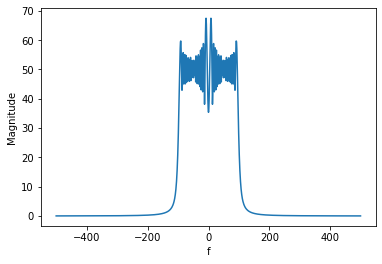

In [6]:
import numpy as np
import scipy.signal as signal
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 1000, endpoint = False )
x = signal.chirp( t, 0, 1, 100, 'linear' )

f = fftshift( fftfreq( 1000, 0.001 ) )
X = fftshift( fft( x ) ) 
Xm = abs( X )  

plt.plot( f, Xm )
plt.xlabel( 'f' )
plt.ylabel( 'Magnitude' )

plt.show( )

## <font color='blue'>Power Spectral Density</font>

### Energy (能量)
The energy of a continue-time signal $x(t)$ can be defined as 
\begin{equation}
E = \int_{-\infty}^{\infty} |x(t)|^2 dt 
\end{equation}

Also, the energy of a discete-time signal $x[n]$ can be defined as 
\begin{equation}
E = \sum_{n=-\infty}^{\infty} x[n]^2  
\end{equation}

### Parseval's Theorem (帕塞瓦爾定理)
If a continue-time signal $x(t)$ is transformed to $X(f)$. 
\begin{equation}
X(f) = \int_{-\infty}^{\infty} x(t) e^{-j(2\pi ft)} dt 
\end{equation}

Then, the energy of the signal is 
\begin{equation}
E = \int_{-\infty}^{\infty} |x(t)|^2 dt = \int_{-\infty}^{\infty} |X(f)|^2 df    
\end{equation}

Prof: <br>
From IFT, we have
\begin{equation}
x(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega)e^{j\omega t} d\omega    
\end{equation}

So,   
\begin{equation}
\begin{split}
   E &= \int_{-\infty}^{\infty} x(t)[\frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega)e^{j\omega t} d\omega ] dt \\    
     &= \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega)[\int_{-\infty}^{\infty} x(t)e^{j\omega t}dt]d\omega \\
     &= \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega)X(-\omega)d\omega \\
     &= \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega)X^*(\omega)d\omega \\
     &= \frac{1}{2\pi} \int_{-\infty}^{\infty} |X(\omega)|^2d\omega \\
     &= \frac{1}{2\pi} \int_{-\infty}^{\infty} |X(f)|^2 df 
\end{split}
\end{equation} 

### Energy Spectal Density (能量譜密度)
For a continue-time signal $x(t)$, the Energy Spectal Density indicates the energies distribution of the signal 
defined as
\begin{equation}
S_{xx}(f)=|X(f)|^2
\end{equation}

### Power Spectal Density (功率頻密度)
It used to show the power distribution of the signal.<br>

Two methods: Periodogram (週期圖) and Welch's method 

#### <font color='green'> Example 7: PSD</font>
(a) A white noise $\eta(t)$ .<br>
(b) $x(t)=10 \cos(2\pi \cdot (100) \cdot t) + 5 \cos(2\pi \cdot (200) \cdot t) + \eta(t)$ <br>
The signals are generated for 1 sec with magnitude between -1 and 1 as well as sampling rate = 1000 Hz.<br>
Try to show the PSD using Periodogram and Welch's method. <br> 
Sol: <br>

(a)
<div>
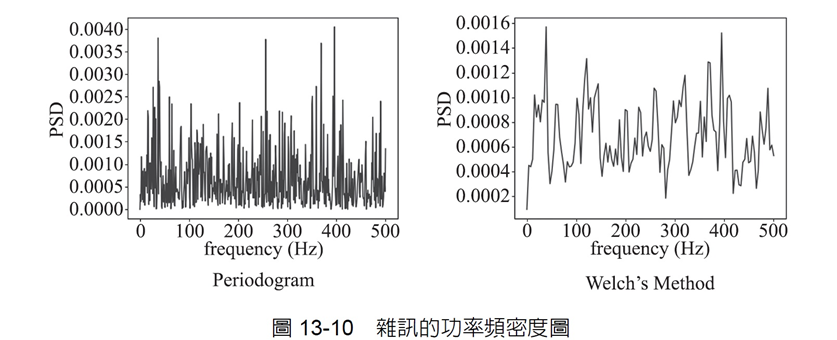
</div>

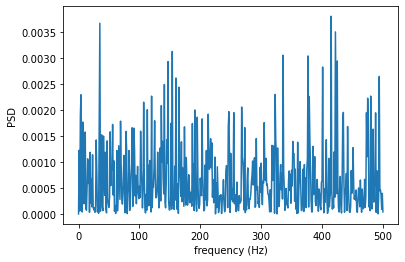

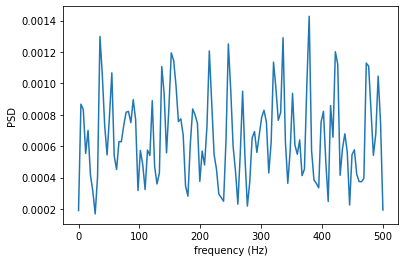

In [7]:
import numpy as np
import numpy.random as random
import scipy.signal as signal
import matplotlib.pyplot as plt

fs = 1000
t = np.linspace( 0, 1, fs, endpoint = False )
noise = random.uniform( -1, 1, fs )	

#Estimate power spectral density using a periodogram.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html#scipy.signal.periodogram
# scipy.signal.periodogram(x, fs=1.0, window='boxcar', nfft=None, detrend='constant', 
#                          return_onesided=True, scaling='density', axis=- 1
f1, pxx1 = signal.periodogram( noise, fs )

# Estimate power spectral density using Welch’s method.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch
# scipy.signal.welch(x, fs=1.0, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', 
#                    return_onesided=True, scaling='density', axis=- 1, average='mean')
f2, pxx2 = signal.welch( noise, fs )

plt.figure( 1 )
plt.plot( f1, pxx1 )
plt.xlabel( 'frequency (Hz)' )
plt.ylabel( 'PSD' )

plt.figure( 2 )
plt.plot( f2, pxx2 )
plt.xlabel( 'frequency (Hz)' )
plt.ylabel( 'PSD' )

plt.show( )

(b)
<div>
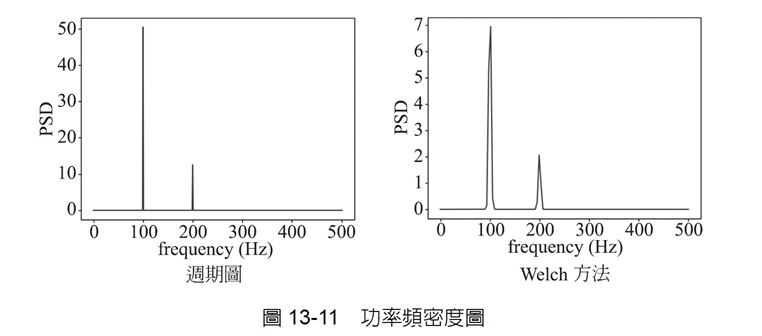
</div>

<div>
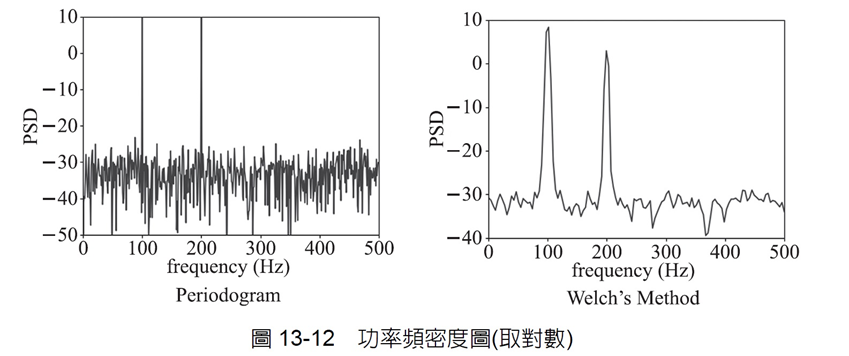
</div>

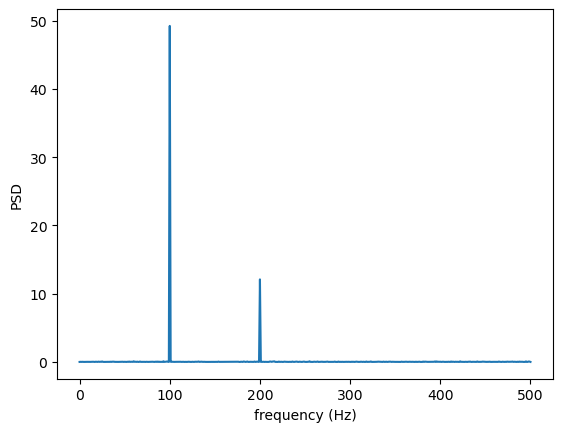

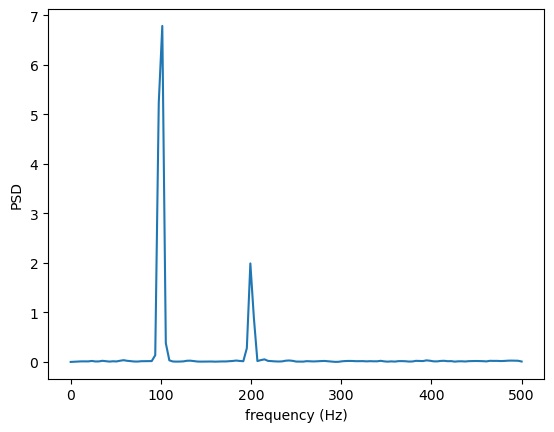

In [1]:
import numpy as np
import numpy.random as random
import scipy.signal as signal
import matplotlib.pyplot as plt

fs = 1000
t = np.linspace( 0, 1, fs, endpoint = False )
x = 10 * np.cos( 2 * np.pi * 100 * t ) + 5 * np.cos( 2 * np.pi * 200 * t ) + 5*random.uniform( -1, 1, fs )	

f1, pxx1 = signal.periodogram( x, fs )
f2, pxx2 = signal.welch( x, fs )

plt.figure( 1 )
plt.plot( f1, pxx1 )
plt.xlabel( 'frequency (Hz)' )
plt.ylabel( 'PSD' )

plt.figure( 2 )
plt.plot( f2, pxx2 )
plt.xlabel( 'frequency (Hz)' )
plt.ylabel( 'PSD' )

plt.show( )

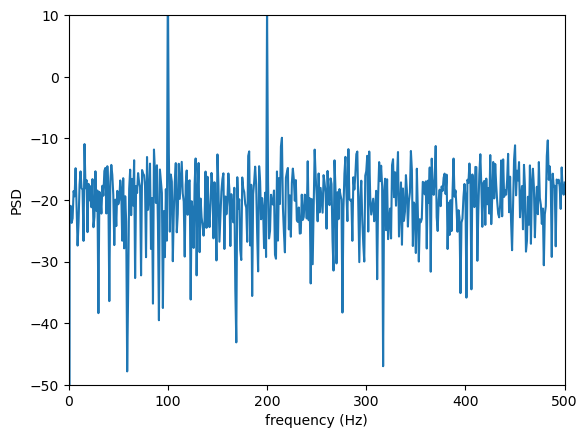

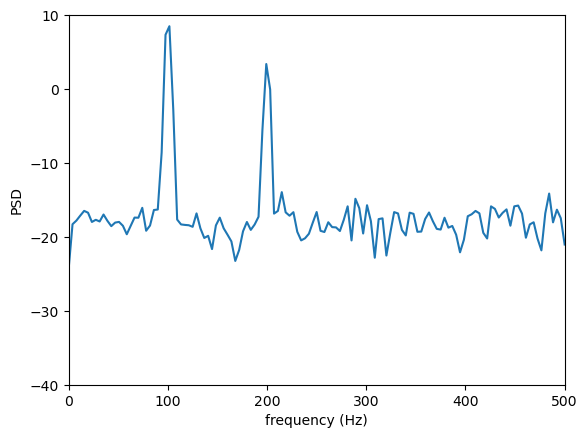

In [2]:
import numpy as np
import numpy.random as random
import scipy.signal as signal
import matplotlib.pyplot as plt

fs = 1000
t = np.linspace( 0, 1, fs, endpoint = False )
x = 10 * np.cos( 2 * np.pi * 100 * t ) + 5 * np.cos( 2 * np.pi * 200 * t ) 
noise = random.uniform( -1, 1, fs )	
y = x + 5* noise

f1, pxx1 = signal.periodogram( y, fs )
f2, pxx2 = signal.welch( y, fs )

lp1 = 10 * np.log10( pxx1 )
lp2 = 10 * np.log10( pxx2 )

plt.figure( 1 )
plt.plot( f1, lp1 )
plt.xlabel( 'frequency (Hz)' )
plt.ylabel( 'PSD' )
plt.axis( [ 0, 500, -50, 10 ] )

plt.figure( 2 )
plt.plot( f2, lp2 )
plt.xlabel( 'frequency (Hz)' )
plt.ylabel( 'PSD' )
plt.axis( [ 0, 500, -40, 10 ] )

plt.show( )

## <font color='red'> Problem</font>
### Reference: 
The Fast Fourier Transform (FFT): Most Ingenious Algorithm Ever? <br>
https://www.youtube.com/watch?v=h7apO7q16V0 <br>

頻譜分析儀如何處理量測信號？<br>
https://www.youtube.com/watch?v=jcYaRaduw6U